In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df1 = pd.read_csv("D:/new_insurance_data.csv")

In [54]:
df1.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [55]:
df1.shape

(1338, 13)

In [9]:
df1.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [6]:
df1.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [56]:
col = list(df1.columns)
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [57]:
for col_name in col:
    if df1[col_name].dtype == "object":
        df1[col_name] = df1[col_name].fillna(df1[col_name].mode())
    else:
        df1[col_name] = df1[col_name].fillna(df1[col_name].mean())

In [10]:
df1.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

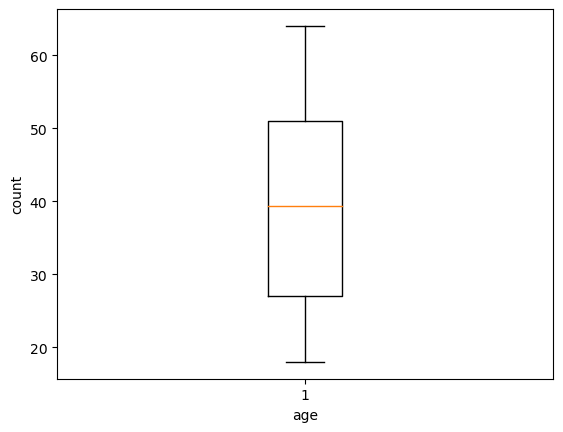

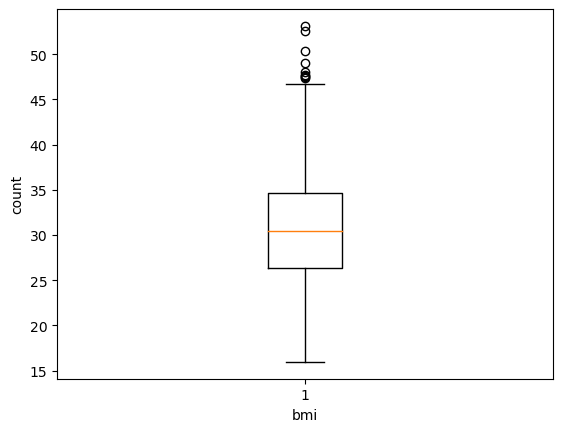

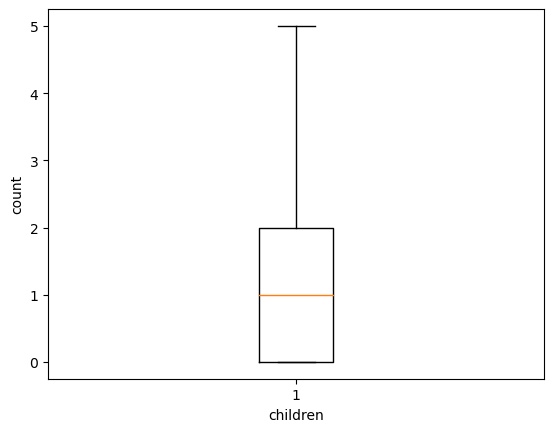

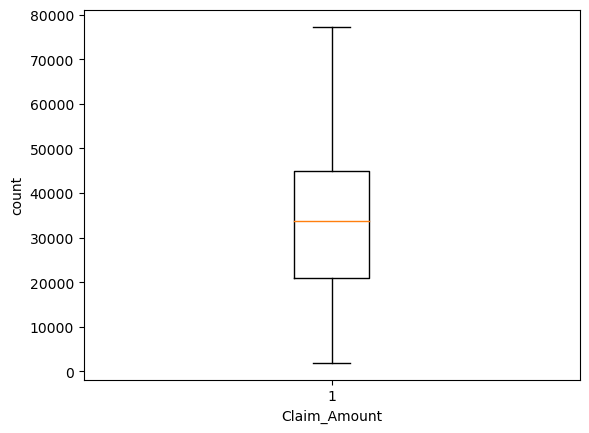

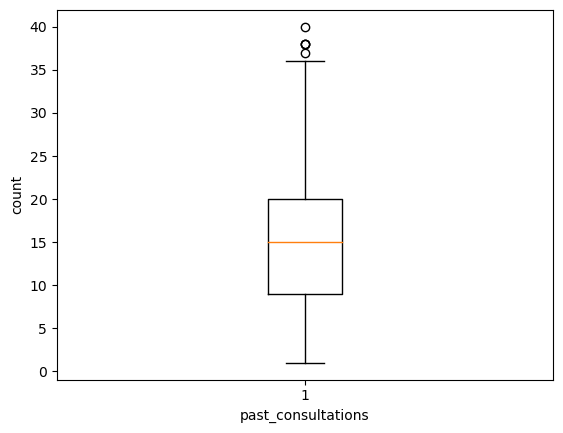

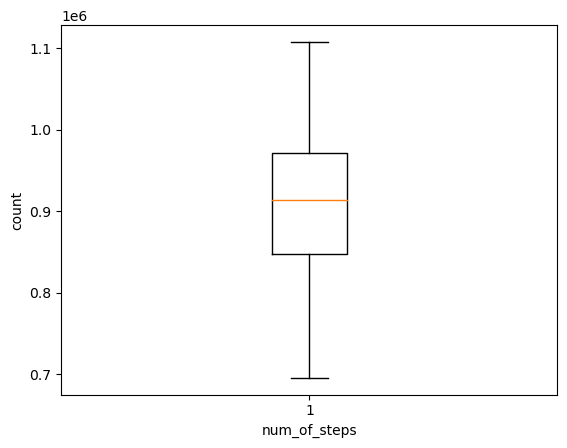

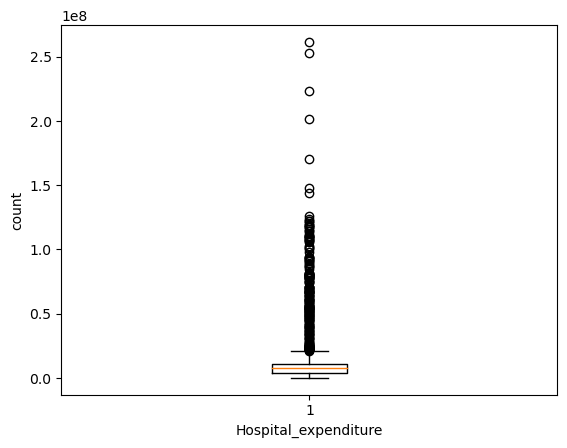

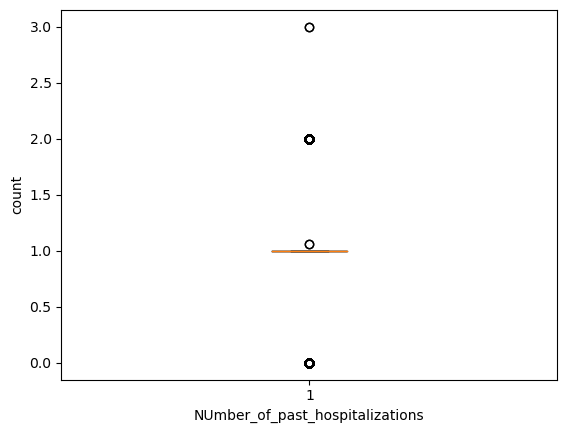

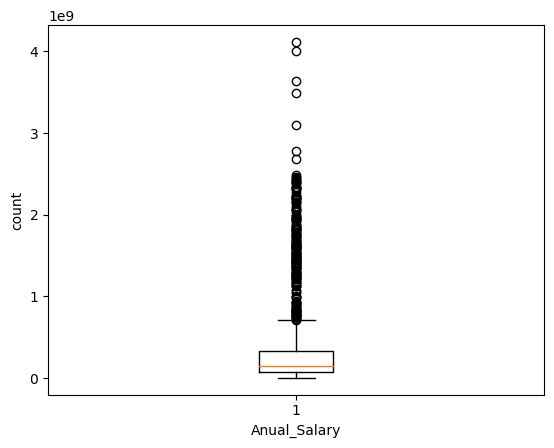

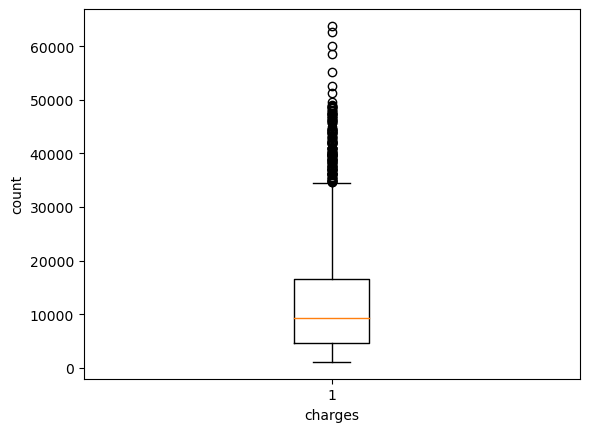

In [58]:
for col_name in col:
    if df1[col_name].dtype!="object":
        plt.boxplot(df1[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

In [59]:
#remove outliers
q1 = df1.bmi.quantile(0.25)
q3 = df1.bmi.quantile(0.75)
iqr = q3 - q1
df1 = df1[(df1.bmi>= q1 - 1.5*iqr) & (df1.bmi <= q3 + 1.5*iqr)]

q1 = df1.Hospital_expenditure.quantile(0.25)
q3 = df1.Hospital_expenditure.quantile(0.75)
iqr = q3 - q1
df1 = df1[(df1.Hospital_expenditure>= q1 - 1.5*iqr) & (df1.Hospital_expenditure <= q3 + 1.5*iqr)]

q1 = df1.Anual_Salary.quantile(0.25)
q3 = df1.Anual_Salary.quantile(0.75)
iqr = q3 - q1
df1 = df1[(df1.bmi>= q1 - 1.5*iqr) & (df1.bmi <= q3 + 1.5*iqr)]

q1 = df1.Anual_Salary.quantile(0.25)
q3 = df1.Anual_Salary.quantile(0.75)
iqr = q3 - q1
df1 = df1[(df1.Anual_Salary>= q1 - 1.5*iqr) & (df1.Anual_Salary <= q3 + 1.5*iqr)]

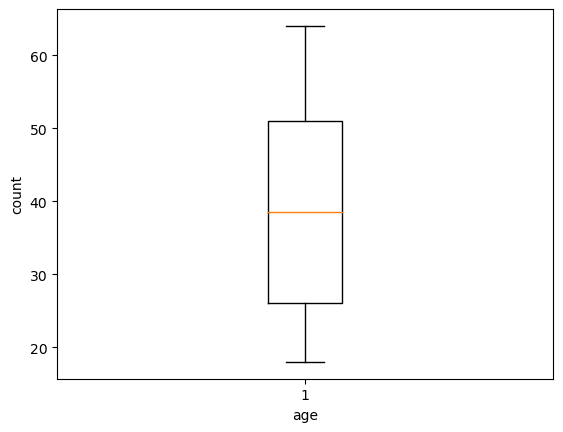

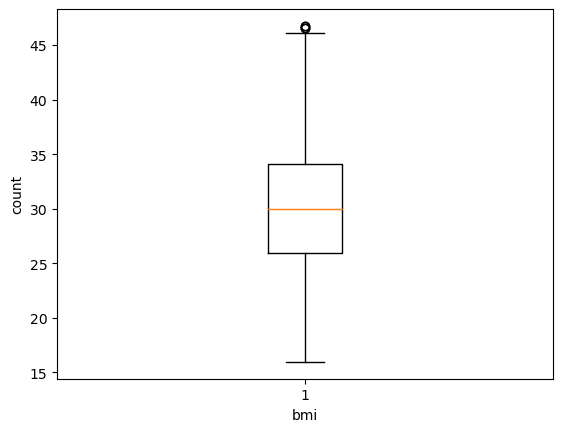

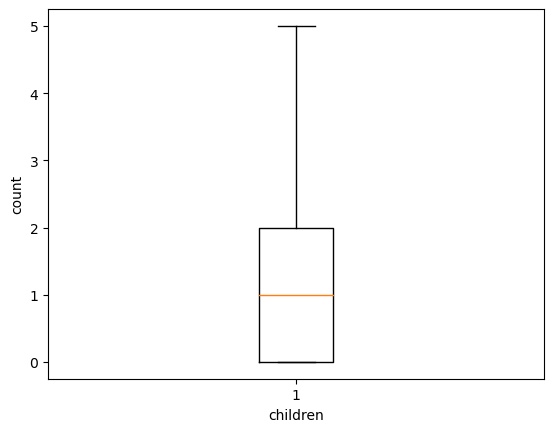

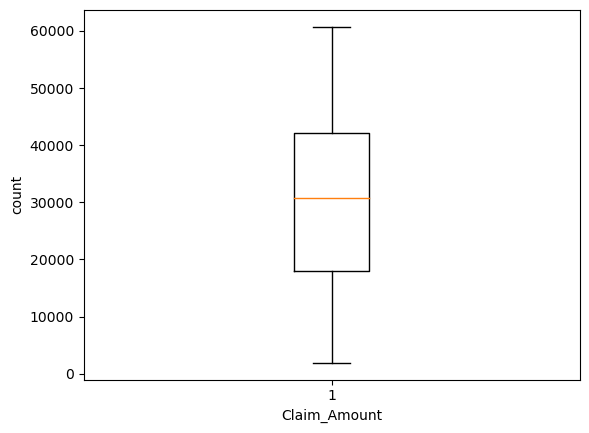

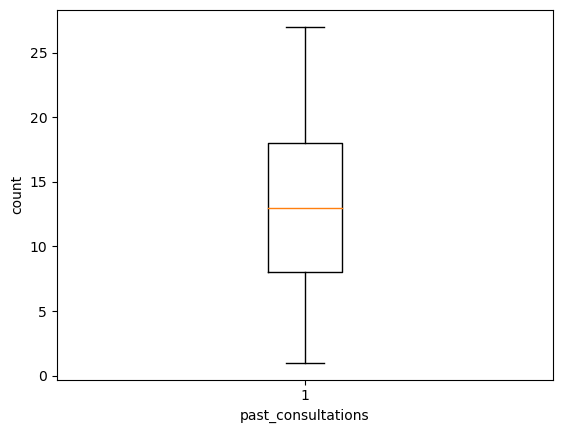

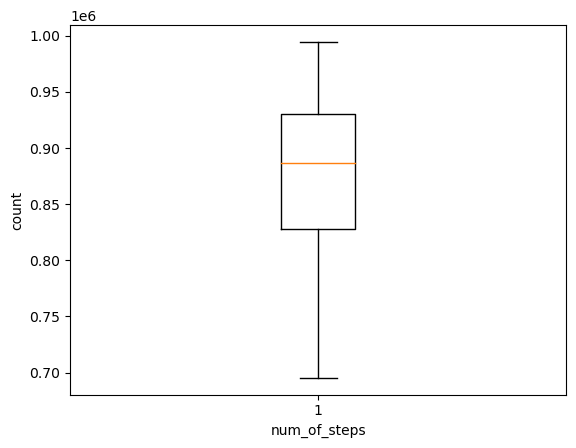

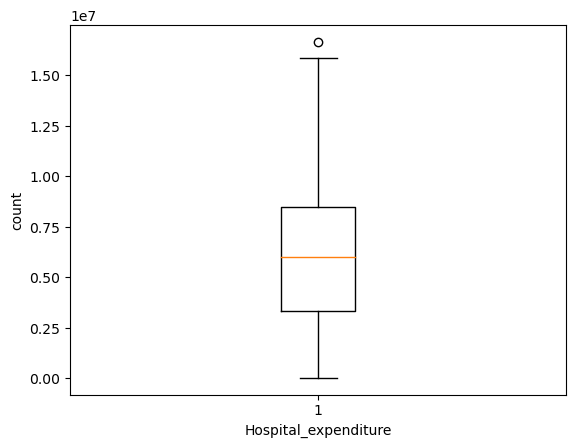

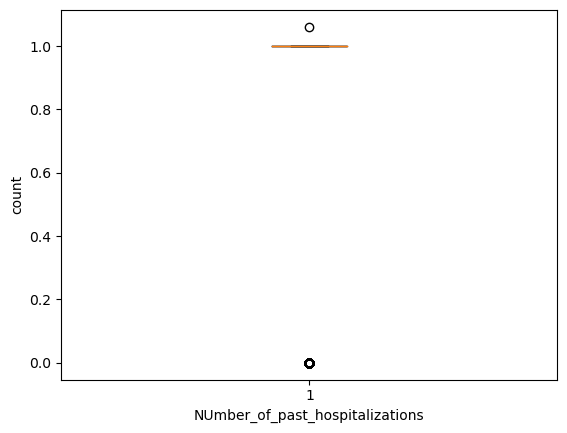

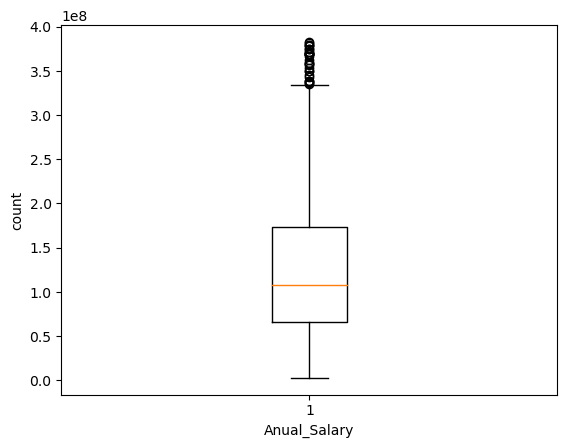

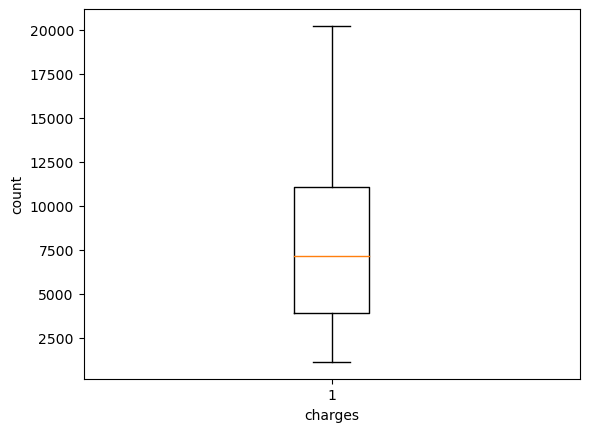

In [60]:
for col_name in col:
    if df1[col_name].dtype!="object":
        plt.boxplot(df1[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

In [16]:
df1.shape

(1030, 13)

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df1.columns:
    if ((df1[col].dtype!= "object") & ( col != "charges")):
        col_list.append(col)
        
x = df1[col_list]
vif_data = pd.DataFrame()
vif_data["features"] = x.columns 
vif_data["vif"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

               features       vif
0              children  1.713101
1          Claim_Amount  4.152224
2    past_consultations  4.670212
3  Hospital_expenditure  4.320876
4          Anual_Salary  4.279483


In [66]:
df1 = df1.drop(["bmi"], axis = 1)

In [68]:
df1 = df1.drop(["NUmber_of_past_hospitalizations"], axis = 1)

In [32]:
df1 = df1.drop(["children"], axis = 1)

In [70]:
x = df1.loc[:,['children',"Claim_Amount", "past_consultations", "Hospital_expenditure", "Anual_Salary" ]]
y = df1.iloc[:,-1]

In [71]:
x.head()

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
0,0.0,29087.54313,17.0,4720920.992,55784970.05
1,0.0,39053.67437,7.0,4329831.676,13700885.19
2,0.0,39023.62759,19.0,6884860.774,73523107.27
3,0.0,28185.39332,11.0,4274773.550,75819679.60
4,0.0,14697.85941,16.0,3787293.921,23012320.01


In [72]:
y.head()

0    1121.8739
1    1131.5066
2    1135.9407
3    1136.3994
4    1137.0110
Name: charges, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr

In [90]:
x_train, y_train, x_test, y_test = tts(x,y, train_size= 0.8, random_state = 0)

In [91]:
x_train.count()

children                824
Claim_Amount            824
past_consultations      824
Hospital_expenditure    824
Anual_Salary            824
dtype: int64

In [92]:
y_train.count()

children                206
Claim_Amount            206
past_consultations      206
Hospital_expenditure    206
Anual_Salary            206
dtype: int64

In [93]:
x_test.count()

824

In [94]:
y_test.head()

752    10704.4700
723    10197.7722
177     2801.2588
834    11848.1410
718    10107.2206
Name: charges, dtype: float64

In [76]:
l_model=lr()

In [101]:
l_model.fit(x_train, x_test)

LinearRegression()

In [104]:
prediction = l_model.predict(y_train)

In [103]:
prediction

array([ 8636.77102076,  5889.89113882, 15510.15506332,  4534.92941325,
       11476.8923922 ,  4790.24544065,  2226.43019619, 14580.40311238,
       18281.06573485,  5779.13917531,  9971.98821711,  8280.80960392,
       12273.87781543, 17551.84469937,  2094.55275057,  5142.38710764,
       12387.39416343,  6423.03514025,  9022.97286233,  5124.91472943,
       15186.68881153,  3390.02964113,  7783.52737648, 12373.40805558,
        7044.87450697, 12537.01546368,  1984.92004357,  5292.93806285,
        5677.81955856,  6669.72484715, 18550.0882346 , 12171.85956404,
        3015.25403532,  5723.10604427,  1893.9007627 ,  4878.70389425,
       10253.08347323,  6787.5554486 ,  4519.0899566 ,  5930.20374602,
        8546.66285511,  3020.70144386,  7596.74648984,  4651.49079173,
        8319.69579178, 11814.77524627, 18159.61248909,  5380.48245879,
       10795.88105085,  9205.23720251, 12884.6309035 ,  2313.04971677,
        2290.56603928,  3408.29277405,  3780.09878991,  2099.40617414,
      

In [79]:
from sklearn.metrics import *

In [105]:
r2 = r2_score(y_test, prediction)
r2

0.843600340963812